### Prepare spectrogram:

Import packages and functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plot_spectrogram import plot_spectrogram
from hanning_background import hanning_background

# plot_spectrogram takes inputs X, Y (meshgrid) and 2D data matrix Z. Furthermore number of figure and label of colorbar
# hanning background takes data matrix and time axis



In [3]:
#import matplotlib
#matplotlib.rcsetup.all_backends
#%matplotlib auto

Load data

In [4]:
Z = np.loadtxt("spectrogram_data/out_1.txt").T
x = np.loadtxt("spectrogram_data/xaxis_1.txt")
y = np.loadtxt("spectrogram_data/yaxis_1.txt")

X, Y = np.meshgrid(x, y)

Summing over Z along x (time) and calculate ratio  Z/Backround

In [78]:
Background1 = hanning_background(Z, x)
rate = np.copy(Z)/Background1




### plot spectrogram 

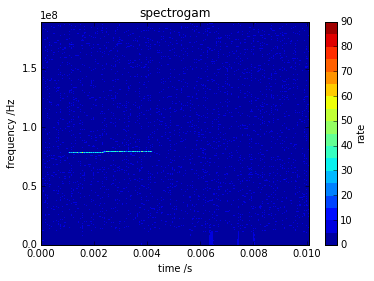

In [79]:
#plot_spectrogram(X, Y, Z*10**9, 1, "Power /nWatt" )
plot_spectrogram(X, Y, rate, 2, "rate" )


### Create multiple lines

(15566, 123) (15566, 123)


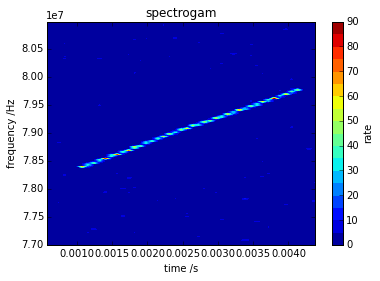

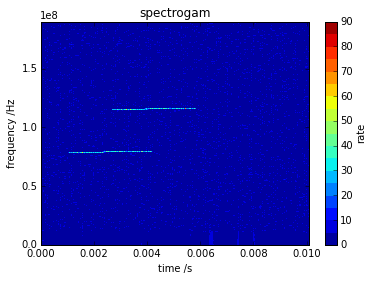

In [80]:
x_win_cen = 0.0025
y_win_cen = 79.0*10**6
ymin = np.min(np.where(np.abs(y-y_win_cen)<2.0*10**6)[0])
ymax = np.max(np.where(np.abs(y-y_win_cen)<2.0*10**6)[0])
xmin = np.min(np.where(np.abs(x-x_win_cen)<0.002)[0])
xmax = np.max(np.where(np.abs(x-x_win_cen)<0.002)[0])

xcut = x[xmin:xmax]
ycut = y[ymin:ymax]
cutfromdata = rate[ymin:ymax,xmin:xmax]

Xcut, Ycut = np.meshgrid(xcut, ycut)
plot_spectrogram(Xcut, Ycut, cutfromdata, 3, "rate")

x_shift = 20
y_shift = 3000

rate0 = rate
rate[ymin+y_shift:y_shift+ymax,x_shift+xmin:x_shift+xmax] = cutfromdata
print np.shape(rate), np.shape(X)
plot_spectrogram(X, Y, rate, 4, "rate")


## Furses algorithm

give score to datapoints

In [85]:
""" parameters"""


aplus = 1.0
aminus = -3.0
bplus = 1.5
bminus = 1.0
t = 1.5

scores = np.zeros(np.shape(rate))

scores[np.where(rate>=t)] = aplus*(rate[np.where(rate>=t)]-t)**bplus
scores[np.where(rate<t)] = aminus*(t-rate[np.where(rate<t)])**bminus


#plot_spectrogram(X, Y, scores, 3, "scores")


#### line object

In [86]:
class line:
    def __init__(self, startpos, startfreq, startscore):
        
        self.active = 1
        
        
        "point lists"
        self.scorelist = []
        self.binlist= []
        self.freqlist = []
        self.trimming_limits = []
        
        "line porperties"
        self.slope = 0
        self.length = 1
        self.score = startscore
        self.startpos = startpos
        self.startfreq = startfreq
        
        " fill lists"
        self.scorelist.append(self.score)
        self.binlist.append(self.startpos)
        self.freqlist.append(startfreq)
        self.trimming_limits.append(np.mean(slice0)) 

        
    " class functin to check whether new point candidates fits in line"
    
    def investigate_point(self, pos, freqin, curslice):
        
        match = 0
        if pos-self.binlist[-1] > bin_delta:
            self.active = 0
       
        if  np.abs(freqin-(self.startfreq+self.slope*(pos-self.startpos)))< freq_delta: #np.abs(pos-self.curpos)<=bin_delta and

            
            "check neighbour points"
            freq, score = converge_function(freqin, curslice)
            
            if  np.abs(freq-(self.startfreq+self.slope*(pos-self.startpos)))< freq_delta:
                
                freqin = freq
                match = 1
                
      
                "calculate new line properties"
                self.length = pos - self.startpos
         
                self.slope =np.mean(np.abs((freqin-np.array(self.freqlist))/(pos-np.array(self.binlist))))
      

                "collect points"
                self.freqlist.append(freqin)
                self.binlist.append(pos)
                self.scorelist.append(score)
                self.trimming_limits.append(np.mean(slice0))

                "calculate new line score"

                if self.length > lan and np.sum(self.scorelist[int(-lan):-1]) < line_thresh:
                    self.active = 0

           
        return match, freqin
    
    "trim edges"
    def trimming(self):
        print self.trimming_limits[-1]   
        while self.scorelist[-1] < mu*self.trimming_limits[-1] and len(self.binlist)<lan:

            del self.scorelist[-1]
            del self.binlist[-1]
            del self.freqlist[-1]
            del self.trimming_limits[-1]
                                      
        while self.scorelist[0] < mu*self.trimming_limits[0] and len(self.binlist)<lan:

            del self.scorelist[0]
            del self.binlist[0]
            del self.freqlist[0]  
            del self.trimming_limits[0]
            
        "final properties"
        self.length = len(self.binlist)
        self.startfreq = self.freqlist[0]
        #self.slope = self.freqlist[-1]-self.freqlist[0]
        
        for i in range(self.length):

            j = np.where(np.abs(self.freqlist[i]-y)==np.min(np.abs(self.freqlist[i]-y)))[0][0]
            self.scorelist[i] = np.sum(scores[j-nu:j+nu,self.binlist[i]])

        return 

function to inspect nearby datapoint and recalculated weighed frequency

In [87]:
def converge_function(f, s1):
    delta = freq_delta + df
    loop_counter = 0

    
    while np.abs(delta) > freq_delta:
        loop_counter += 1
        if loop_counter > 10:
            f = 0
            # print "loop error", delta, jj
            break
        
        else:

            j = np.where(np.abs(y-f)==np.min(np.abs(y-f)))[0][0]
            score = s1[j]
            if j>bin_delta and j < np.shape(y)[0]-bin_delta:
                new_freq = np.average(y[j-bin_delta:j+bin_delta+1], weights=s1[j-bin_delta:j+bin_delta+1])

                score = np.sum(s1[j-bin_delta:j+bin_delta+1])
                delta = np.abs(new_freq-f)
                f = new_freq
                    
    f1 = f
    global slice1
    slice1[j-bin_delta:j+bin_delta+1] = -sigma

    
    return f1, score

find lines in instreaming data slices

In [88]:
" parameters" 
mu = 0.5
nu = 2
thresh = 0.02*np.max(scores)
sigma = -5.0
lan = 10.0
line_thresh = lan*thresh*0.9



" acceptance"
bin_delta = 10
df = (y[1]-y[0])

freq_delta = df*bin_delta


" dictionary of lines"
candidates = {}
counter = 0


" instreaming slices"
slice_number = np.shape(x)[0]
s = np.copy(scores)


for ii in range(slice_number):

    freq = 0
    slice0 = s[:, ii]
    slice1 = np.copy(slice0)
    freq_list = np.where(slice1>=thresh)
    
    if len(slice1[freq_list]) > 0:


        for ll in range(len(slice1[freq_list])):  

            old_freq = freq
            freq = y[freq_list[0][ll]]

                        
            if np.abs(old_freq-freq) > freq_delta:
                match = 0 

                "let existing lines check if new point is a match"
                
                candidates2check = {k:v for (k,v) in candidates.iteritems() if (ii-v.binlist[-1] > 0 and v.active ==1)} 
               
                for jj in candidates2check.keys():

                    match, new_freq = candidates[jj].investigate_point(ii, freq, slice1) 
                    
                    if match == 1:
                        freq = new_freq

                        break
                        
                "otherwise create new line"
                if match == 0:
                    freq, score = converge_function(freq, slice1)
                    candidates[str(counter)] = line(ii, freq, score)

                    counter += 1
 
                    
                
print "total number of candidates: ", counter                            

candidates = {k:v for (k,v) in candidates.iteritems() if (v.slope != 0 and v.length >= lan)}
    
for mm in candidates.keys():

        candidates[mm].trimming()
    
candidates = {k:v for (k,v) in candidates.iteritems() if (v.slope != 0 and v.length >= lan)}

for mm in candidates.keys():
    print "\ncandidate ", mm
    print "start [s]: " , x[candidates[mm].startpos]
    print "frequency [MHz]: ", candidates[mm].startfreq/10**6
    print "total score: ", candidates[mm].score
    print "slope ",  candidates[mm].slope
    print "length [bins]", candidates[mm].length
#    print candidates[mm].curfreq

total number of candidates:  584
-1.96043701424
-1.91973637444


IndexError: list index out of range

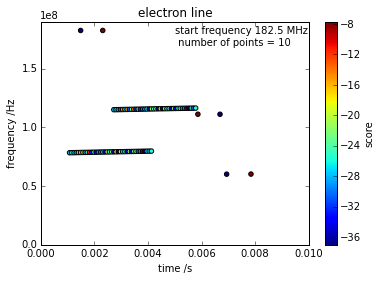

In [89]:
import matplotlib.pyplot as plt

fig = plt.figure(1)
ax = fig.add_subplot(111)
for mm in candidates.keys():
    line1 = candidates[mm]

    plt.scatter(x[line1.binlist], line1.freqlist, c=line1.scorelist)



anot_text = 'start frequency '+str(np.round(line1.startfreq/10**5)/10)+' MHz \n number of points = '+ str(line1.length)
ax.text(0.005, 1.7*10**8, anot_text)
        #bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
plt.xlim([0, 0.01])
plt.ylim([np.min(y), np.max(y)])
plt.title('electron line')
plt.xlabel('time /s')
plt.ylabel('frequency /Hz')
cbar = plt.colorbar()
cbar.ax.set_ylabel('score')
plt.show()

